<a href="https://colab.research.google.com/github/butchland/fastai_nb_explorations/blob/master/catdog_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl https://course19.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    836      0 --:--:-- --:--:-- --:--:--   834
Updating fastai...
Done.


In [4]:
!pip install -Uqq fastcore
!pip install -Uqq fastai

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
path.ls()[:10]


(#10) [Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_1.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_69.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_111.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_75.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_137.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_119.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_87.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_235.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_5.jpg')]

In [4]:
Path.BASE_PATH = path

In [5]:
def is_cat(item):
  return 'cat' if item.name[0].isupper() else 'dog'

In [6]:
(is_cat(path.ls()[0]), is_cat(path.ls()[8]))

('cat', 'cat')

In [7]:
datablock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y=is_cat,
    splitter=RandomSplitter(seed=42),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_34.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=250x202
  Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_34.jpg
    applying is_cat gives
      cat
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=250x202, TensorCategory(0))


Setting up after_item: Pipeline: Resize -- {'size': (224, 224), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch

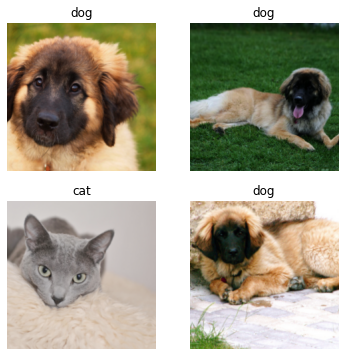

In [8]:
datablock.summary(path,show_batch=True)

In [9]:
dblk_trng = datablock.new(item_tfms=Resize(224), batch_tfms=aug_transforms())

In [10]:
dblk_trng.summary(path)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_34.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=250x202
  Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_34.jpg
    applying is_cat gives
      cat
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=250x202, TensorCategory(0))


Setting up after_item: Pipeline: Resize -- {'size': (224, 224), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch

In [11]:
dls = dblk_trng.dataloaders(path)

In [12]:
learn = cnn_learner(dls,resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [13]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.140851,0.009988,0.994587,00:46


epoch,train_loss,valid_loss,accuracy,time
0,0.077603,0.049354,0.987821,00:48
1,0.040374,0.010744,0.997294,00:48
2,0.019111,0.011545,0.996617,00:48
3,0.009745,0.007999,0.997294,00:48


In [14]:
learn.save('stage-1')

Path('models/stage-1.pth')

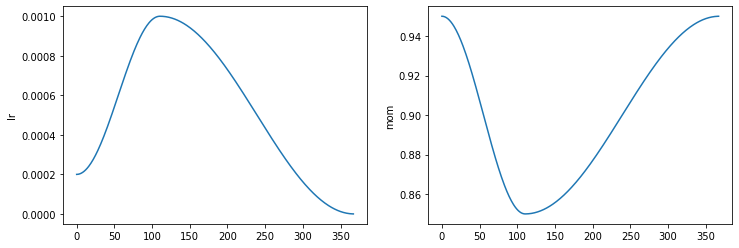

In [15]:
learn.recorder.plot_sched()

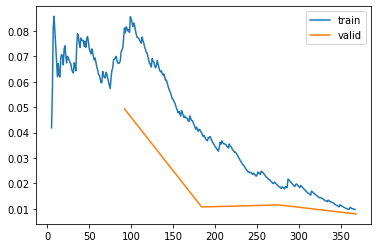

In [16]:
learn.recorder.plot_loss()

In [17]:
interpreter = ClassificationInterpretation.from_learner(learn)

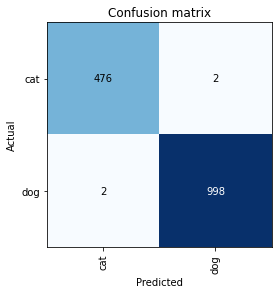

In [18]:
interpreter.plot_confusion_matrix()

In [19]:
interpreter.most_confused(1)

[('cat', 'dog', 2), ('dog', 'cat', 2)]

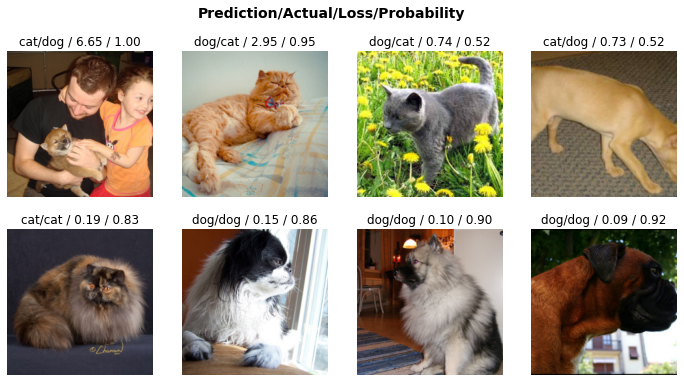

In [20]:
interpreter.plot_top_losses(8)

In [21]:
learn.export('catdog_classifier.pkl')

In [22]:
!mkdir -p /content/drive/My\ Drive/fastai_v4/models/catdog_pets

In [23]:
cp models/*.pth /content/drive/My\ Drive/fastai_v4/models/catdog_pets/.

In [24]:
cp catdog_classifier.pkl /content/drive/My\ Drive/fastai_v4/models/catdog_pets/.